# Pipeline, Hyperparameter Tuning

A machine learning pipeline can be created by putting together a sequence of steps involved in training a machine learning model. It can be used to automate a machine learning workflow. The pipeline can involve pre-processing, feature selection, classification/regression, and post-processing. More complex applications may need to fit in other necessary steps within this pipeline.

Reference: https://machinelearningmastery.com/modeling-pipeline-optimization-with-scikit-learn/

In [1]:
from pandas import read_csv # For dataframes
from pandas import DataFrame # For dataframes
from numpy import ravel # For matrices
import matplotlib.pyplot as plt # For plotting data
import seaborn as sns # For plotting data
from sklearn.model_selection import train_test_split # For train/test splits
from sklearn.neighbors import KNeighborsClassifier # The k-nearest neighbor classifier
from sklearn.feature_selection import VarianceThreshold # Feature selector
from sklearn.pipeline import Pipeline # For setting up pipeline
# Various pre-processing steps
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, PowerTransformer, MaxAbsScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV # For optimization

We’ll use the Ecoli Dataset from the UCI Machine Learning Repository to demonstrate all the concepts of this tutorial. This dataset is maintained by Kenta Nakai. Let’s first load the Ecoli dataset in a Pandas DataFrame and view the first few rows.

https://archive.ics.uci.edu/ml/datasets/Ecoli


,0,1,2,3,4,5,6,7,8
0,AAT_ECOLI,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,ACEA_ECOLI,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,ACEK_ECOLI,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,ACKA_ECOLI,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,ADI_ECOLI,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp


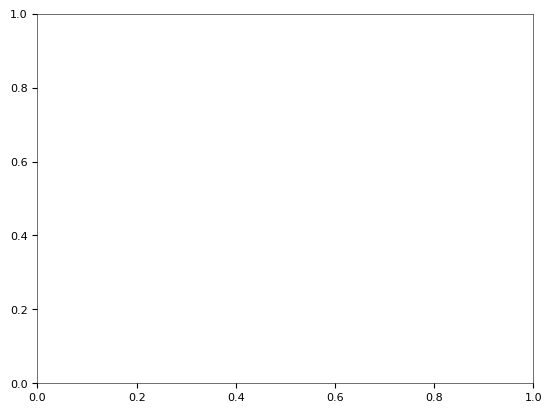

from matplotlib import pyplot as plt
_df_21[1].plot(kind='hist', bins=20, title=1)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_22[2].plot(kind='hist', bins=20, title=2)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_23[5].plot(kind='hist', bins=20, title=5)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_24[6].plot(kind='hist', bins=20, title=6)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_25.groupby(0).size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_26.plot(kind='scatter', x=1, y=2, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_27.plot(kind='scatter', x=2, y=5, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_28.plot(kind='scatter', x=5, y=6, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_29.plot(kind='scatter', x=6, y=7, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series[3]
  ys = series[1]
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_30.sort_values(3, ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel(3)
_ = plt.ylabel(1)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series[3]
  ys = series[2]
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_31.sort_values(3, ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel(3)
_ = plt.ylabel(2)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series[3]
  ys = series[5]
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_32.sort_values(3, ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel(3)
_ = plt.ylabel(5)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series[3]
  ys = series[6]
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_33.sort_values(3, ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel(3)
_ = plt.ylabel(6)

from matplotlib import pyplot as plt
_df_34[1].plot(kind='line', figsize=(8, 4), title=1)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_35[2].plot(kind='line', figsize=(8, 4), title=2)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_36[5].plot(kind='line', figsize=(8, 4), title=5)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_37[6].plot(kind='line', figsize=(8, 4), title=6)
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_38[0].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_38, x=1, y=0, inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_39[0].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_39, x=2, y=0, inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_40[0].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_40, x=5, y=0, inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_41[0].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_41, x=6, y=0, inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [3]:
# Read ecoli dataset from the UCI ML Repository and store in
# dataframe df
df = read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/ecoli/ecoli.data',
    sep = '\s+',
    header=None)

df.head()

We’ll ignore the first column, which specifies the sequence name. The last column is the class label. Let’s separate the features from the class label and split the dataset into 2/3 training instances and 1/3 test examples.



In [4]:
# The data matrix X
X = df.iloc[:,1:-1]
# The labels
y = (df.iloc[:,-1:])

# Encode the labels into unique integers
encoder = LabelEncoder()
y = encoder.fit_transform(ravel(y))

# Split the data into test and train
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=1/3,
    random_state=0)

print(X_train.shape)
print(X_test.shape)

(224, 7)
(112, 7)


# A Classifier Without a Pipeline and Optimization
First, let’s just check how the k-nearest neighbor performs on the training and test sets. This would give us a baseline for performance.

In [5]:
knn = KNeighborsClassifier().fit(X_train, y_train)
print('Training set score: ' + str(knn.score(X_train,y_train)))
print('Test set score: ' + str(knn.score(X_test,y_test)))

Training set score: 0.9017857142857143
Test set score: 0.8482142857142857


# Setting Up a Machine Learning Pipeline

We’ll set up a very basic pipeline that consists of the following sequence:

1. Scaler: For pre-processing data, i.e., transform the data to zero mean and unit variance using the StandardScaler().

2. Feature selector: Use VarianceThreshold() for discarding features whose variance is less than a certain defined threshold.

3. Classifier: KNeighborsClassifier(), which implements the k-nearest neighbor classifier and selects the class of the majority k points, which are closest to the test example.


In [6]:
pipe = Pipeline([
('scaler', StandardScaler()),
('selector', VarianceThreshold()),
('classifier', KNeighborsClassifier())
])

In [7]:
pipe.fit(X_train, y_train)

print('Training set score: ' + str(pipe.score(X_train,y_train)))
print('Test set score: ' + str(pipe.score(X_test,y_test)))

Training set score: 0.8794642857142857
Test set score: 0.8392857142857143


# Optimizing and Tuning the Pipeline

We can search for the best scalers.

Instead of just the StandardScaler(), we can try MinMaxScaler(), Normalizer() and MaxAbsScaler().


We can search for the best variance threshold to use in the selector, i.e., VarianceThreshold().


We can search for the best value of k for the KNeighborsClassifier().


The parameters variable below is a dictionary that specifies the key:value pairs. Note the key must be written, with a double underscore __ separating the module name that we selected in the Pipeline() and its parameter.

Note the following:

The scaler has no double underscore, as we have specified a list of objects there.


We would search for the best threshold for the selector, i.e., VarianceThreshold(). Hence we have specified a list of values [0, 0.0001, 0.001, 0.5] to choose from.


Different values are specified for the n_neighbors, p parameters of the KNeighborsClassifier().


In [8]:
parameters = {'scaler': [StandardScaler(), MinMaxScaler(),
	Normalizer(), MaxAbsScaler()],
	'selector__threshold': [0, 0.001, 0.01],
	'classifier__n_neighbors': [1, 3, 5, 7, 10],
	'classifier__p': [1, 2]
}

The pipe along with the above list of parameters are then passed to a GridSearchCV() object, that searches the parameters space for the best set of parameters as shown below:



In [9]:
grid = GridSearchCV(pipe, parameters, cv=2).fit(X_train, y_train)

print('Training set score: ' + str(grid.score(X_train, y_train)))
print('Test set score: ' + str(grid.score(X_test, y_test)))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


Training set score: 0.8928571428571429
Test set score: 0.8571428571428571


By tuning the pipeline, we achieved quite an improvement over a simple classifier and a non-optimized pipeline. It is important to analyze the results of the optimization process.



# Analyzing the Results

Let’s look at the tuned grid object and gain an understanding of the GridSearchCV() object.

The object is so named because it sets up a multi-dimensional grid, with each corner representing a combination of parameters to try. This defines a parameter space.

GridSearchCV() object computes the mean cross-validation score on the unseen examples and selects the corner/combination of parameters that give the best result. The code below shows how to access the best parameters of the grid and the best pipeline for our task.

In [10]:
# Access the best set of parameters
best_params = grid.best_params_
print(best_params)
# Stores the optimum model in best_pipe
best_pipe = grid.best_estimator_
print(best_pipe)

{'classifier__n_neighbors': 7, 'classifier__p': 2, 'scaler': StandardScaler(), 'selector__threshold': 0}
Pipeline(steps=[('scaler', StandardScaler()),
                ('selector', VarianceThreshold(threshold=0)),
                ('classifier', KNeighborsClassifier(n_neighbors=7))])


In [11]:
result_df = DataFrame.from_dict(grid.cv_results_, orient='columns')
result_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__n_neighbors,param_classifier__p,param_scaler,param_selector__threshold,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008963,0.003929,0.009062,0.000728,1,1,StandardScaler(),0.000,"{'classifier__n_neighbors': 1, 'classifier__p'...",0.830357,0.767857,0.799107,0.031250,83
1,0.004612,0.000046,0.008130,0.000052,1,1,StandardScaler(),0.001,"{'classifier__n_neighbors': 1, 'classifier__p'...",0.830357,0.767857,0.799107,0.031250,83
2,0.004787,0.000047,0.008072,0.000013,1,1,StandardScaler(),0.010,"{'classifier__n_neighbors': 1, 'classifier__p'...",0.830357,0.767857,0.799107,0.031250,83
3,0.004515,0.000032,0.008100,0.000008,1,1,MinMaxScaler(),0.000,"{'classifier__n_neighbors': 1, 'classifier__p'...",0.848214,0.741071,0.794643,0.053571,91
4,0.004268,0.000045,0.008464,0.000247,1,1,MinMaxScaler(),0.001,"{'classifier__n_neighbors': 1, 'classifier__p'...",0.848214,0.741071,0.794643,0.053571,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.006746,0.000048,0.014101,0.000353,10,2,Normalizer(),0.001,"{'classifier__n_neighbors': 10, 'classifier__p...",0.812500,0.839286,0.825893,0.013393,19
116,0.007003,0.000231,0.014358,0.000536,10,2,Normalizer(),0.010,"{'classifier__n_neighbors': 10, 'classifier__p...",0.687500,0.741071,0.714286,0.026786,113
117,0.006745,0.000102,0.014135,0.000665,10,2,MaxAbsScaler(),0.000,"{'classifier__n_neighbors': 10, 'classifier__p...",0.821429,0.803571,0.812500,0.008929,51
118,0.008719,0.002205,0.012677,0.000721,10,2,MaxAbsScaler(),0.001,"{'classifier__n_neighbors': 10, 'classifier__p...",0.821429,0.803571,0.812500,0.008929,51


This DataFrame is very valuable as it shows us the scores for different parameters. The column with the mean_test_score is the average of the scores on the test set for all the folds during cross-validation. The DataFrame may be too big to visualize manually, hence, it is always a good idea to plot the results. Let’s see how n_neighbors affect the performance for different scalers and for different values of p.



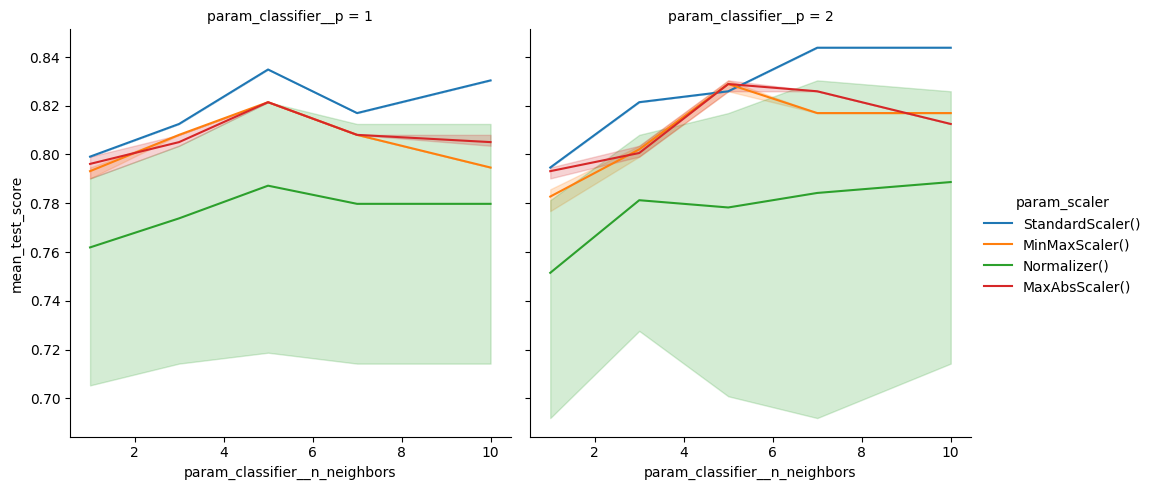

In [12]:
sns.relplot(data=result_df,
	kind='line',
	x='param_classifier__n_neighbors',
	y='mean_test_score',
	hue='param_scaler',
	col='param_classifier__p')
plt.show()

# Exercise 1 (5 points)

1. What is the best set of parameters? Report the optimal values for p (type of distance, p = 1 is manhattan_distance (l1), p = 2 is euclidean_distance (l2)), optimal scaler, and optimal number of neighbors.

The optimal value of P is 2 i.e. the Eucledian Distance is the best in this case. Also according to my findings the optimal scaler is the StandardScaler(). Also the optimal number of neighbours is 7. This is evident in the plot above where we can a observe a peak using this parameters.


# Exercise 2 (5 points)

2. The above example used 2-fold cross validation. How many times did the model fit? How many times will the model fit if we use 10-fold cross validation?

As the model used 2-fold cross validation. The model fit for about 240 times. If we use 10-fold cross validation then the model will fit for about 1200 times.

# Exercise 3 (20 points)

3. Implement 10-fold cross validation for the dataset and example given above. What is the test and training score? What is the best set of parameters?

In [13]:
grid = GridSearchCV(pipe, parameters, cv=10).fit(X_train, y_train)

print('Training set score: ' + str(grid.score(X_train, y_train)))
print('Test set score: ' + str(grid.score(X_test, y_test)))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Training set score: 0.8883928571428571
Test set score: 0.8392857142857143


As per my findings the the training as well as test scores dropped but it was not a significant drop. The slight drop in train and test scores is likely due to the increased generalization provided by 10-fold validation. This suggests your model is robust and generalizes well across different folds, but with more folds, it's being trained on slightly less data at each iteration, leading to a small decrease in the overall performance.